In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv('training.csv',sep=',',decimal='.')
test=pd.read_csv('test.csv',sep=',',decimal='.')



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Unnamed: 0                     576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [6]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [7]:
volume_per_donation=train['Total Volume Donated (c.c.)']/train['Number of Donations']
volume_per_donation.value_counts()

250.0    576
dtype: int64

In [8]:
train=train.drop(labels=['Unnamed: 0','Total Volume Donated (c.c.)'],axis=1)

In [9]:
train.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [10]:
X=train.drop(labels=['Made Donation in March 2007'],axis=1)
y=train['Made Donation in March 2007']

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

cols=[['Months since Last Donation','Number of Donations','Months since First Donation']]
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=cols)



C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=.1
                                                    , random_state=42)

In [13]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [14]:
classifiers = [
    KNeighborsClassifier(3),
    xgb.XGBClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Precision","Recall","F1-score",'neglogloss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    name = clf.__class__.__name__
   
    precision_array=cross_val_score(clf,X_train,Y_train,cv=10,scoring='precision')
    precision=precision_array.mean()
    
    recall_array=cross_val_score(clf,X_train,Y_train,cv=10,scoring='recall')
    recall=recall_array.mean()
    
    f1_array=cross_val_score(clf,X_train,Y_train,cv=10,scoring='f1')
    f1=f1_array.mean()
    
    neg_log_array=cross_val_score(clf,X_train,Y_train,cv=10,scoring='neg_log_loss')
    neg_log=neg_log_array.mean()
    
    

    log_entry = pd.DataFrame([[name,precision,recall,f1,neg_log]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due 

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sameer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0

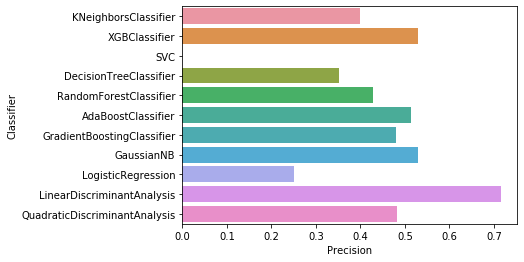

In [15]:
sns.barplot(data=log,x='Precision',y='Classifier')

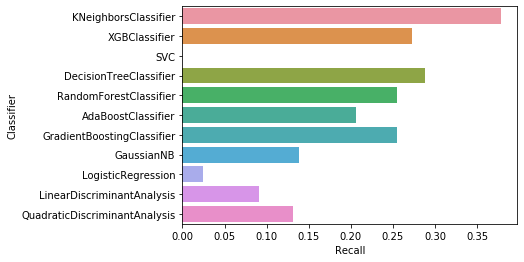

In [16]:
sns.barplot(data=log,x='Recall',y='Classifier')

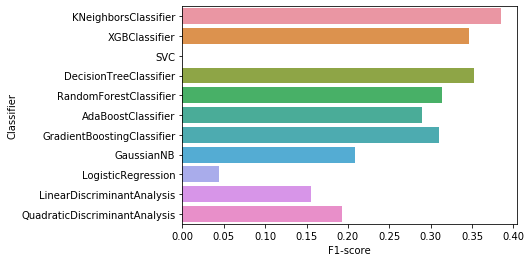

In [17]:
sns.barplot(data=log,x='F1-score',y='Classifier')

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score    
def conf_matrix(clf,X_train,y_train,X_test,y_test):

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    sns.heatmap(confusion_matrix(y_pred,y_test),
                annot=True,annot_kws={"size": 16},
               xticklabels=['Did not Donate','Donated'],
                yticklabels=['Did not Donate','Donated'])
    plt.ylabel('Rows=Predicted Label')
    plt.xlabel('Columns=Actual Label')
    plt.show()
    print(classification_report(y_test,y_pred))
    

In [125]:
def weight_scale(Y_train):
    a0=Y_train.value_counts().get(0)
    a1=Y_train.value_counts().get(1)
    return ((a1)/(a0)*100)

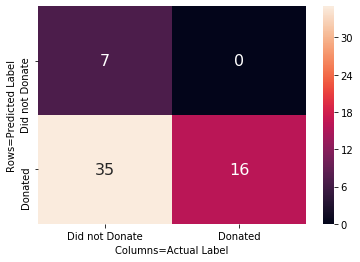

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        42
           1       0.31      1.00      0.48        16

   micro avg       0.40      0.40      0.40        58
   macro avg       0.66      0.58      0.38        58
weighted avg       0.81      0.40      0.34        58



In [126]:
clf = (xgb.XGBClassifier
                        (learning_rate =0.1, 
                         n_estimators=1000, 
                         max_depth=1,
                         min_child_weight=6, 
                         gamma=0.5, 
                         subsample=0.7, 
                         colsample_bytree=0.1,
                         objective= 'binary:logistic', 
                         nthread=4, 
                         scale_pos_weight=weight_scale(Y_train), 
                         seed=27))
conf_matrix(clf,X_train,Y_train,X_test,Y_test)

In [127]:
#Tuning XGB classifier
def modelfit(alg, X_train,Y_train,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=Y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train,eval_metric='auc')
        
    #Predict training set:
    train_predictions = alg.predict(X_train)
    train_predprob = alg.predict_proba(X_train)
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(Y_train.values, train_predictions))
    print ("Precision : %.4g" % precision_score(Y_train.values, train_predictions))
    '''print ("AUC Score (Train): %f" % roc_auc_score(Y_train, train_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')'''

In [128]:
#Choose 
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=weight_scale(Y_train),
 seed=27)


In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_test1 = {
 'max_depth':range(1,15,1),
 'min_child_weight':range(1,15,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=weight_scale(Y_train), seed=27), 
 param_grid = param_test1, scoring='precision',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 13, 'min_child_weight': 1}, 0.2916154537286612)

In [133]:
param_test2 = {
   'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=13,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=weight_scale(Y_train), seed=27), 
 param_grid = param_test2, scoring='precision',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,Y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.2916154537286612)

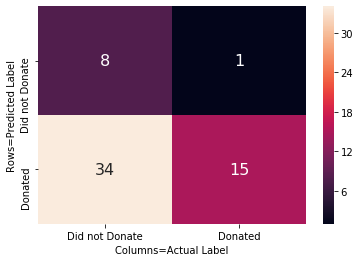

              precision    recall  f1-score   support

           0       0.89      0.19      0.31        42
           1       0.31      0.94      0.46        16

   micro avg       0.40      0.40      0.40        58
   macro avg       0.60      0.56      0.39        58
weighted avg       0.73      0.40      0.35        58



In [135]:
clf = (xgb.XGBClassifier
                        (learning_rate =0.1, 
                         n_estimators=140, 
                         max_depth=13,
                         min_child_weight=1, 
                         gamma=0.0, 
                         subsample=0.7, 
                         colsample_bytree=0.1,
                         objective= 'binary:logistic', 
                         nthread=4, 
                         scale_pos_weight=weight_scale(Y_train), 
                         seed=27))
conf_matrix(clf,X_train,Y_train,X_test,Y_test)

23.552123552123554